In [2]:
# Importing necessary libraries
import numpy as np

In [3]:
# For Data Frame manipulation and other capabilities 
import pandas as pd

In [4]:
# For visalisation purposes 
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# quick glance at the data frame 


In [7]:
# Data Frame shape
df.shape

(8807, 12)

In [8]:
# Column names 
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
# Number of movies Vs Number of Shows 
# As wd can see from the output, ~ no. of movies = 3X no. of shows
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [10]:
## Null Values in Data Frame column wise 
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
## Data types of columns
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
# df.info gives all columns null value count and the datatypes which we have 
# already found out above 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
# By deafult we get output for the only integer col in our df
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [14]:
# Now we include all the non integer columns in the describe as well 
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [15]:
cols = ['type','country','rating','duration']
for i in cols:
  print(df[i].value_counts())
  print("------------------")

Movie      6131
TV Show    2676
Name: type, dtype: int64
------------------
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64
------------------
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64
------------------
1 Season    

In [16]:
# Missing value treatment column-wise

In [17]:
# checking no. of null values in director column and its mode
df['director'].isnull().sum(),df['director'].mode()[0]

(2634, 'Rajiv Chilaka')

In [18]:
# checking no. of null values in cast column and its mode
df['cast'].isnull().sum(),df['cast'].mode()[0]

(825, 'David Attenborough')

In [19]:
# checking no. of null values in country column and its mode
df['country'].isnull().sum(),df['country'].mode()[0]

(831, 'United States')

In [20]:
# replacing null values by "No Director" since there are a lot of null values 
# ~30% rows hence not replacing with mean since it might introduce bias in data
df['director'] = df['director'].fillna("No Director")

In [21]:
# replacing null values by "No Cast"
df['cast'] = df['cast'].fillna("No Cast")

In [22]:
# replacing null values by "No Country"
df['country'] = df['country'].fillna("No Country")

In [23]:
df.shape

(8807, 12)

In [24]:
# Now we are left with 3 columns containing a total of 14 rows with Null Values
# So dropping the 14 rows since 14/8807 ~ 0.16% hence can be dropped 
df = df.dropna()

In [25]:
# No. of rows post droppping Null values is 8790
df.shape

(8790, 12)

In [26]:
# These 17 rows that have been dropped are from the remaining 3 columns 
# which contained null values (date_Added 10, rating 4, duration 3) which adds 
# up to 17 and same can be confirmed from pre and post shape of df
8790-8807

-17

In [27]:
# Final check if there are any Null Values in the Data Frame
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

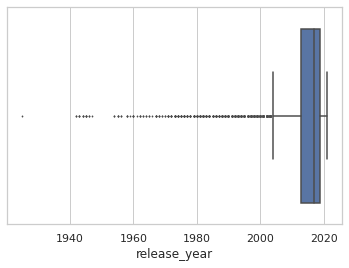

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(data = df, x = "release_year", color = 'b',fliersize = 0.95)

In [29]:
# From the above we can see that "release_year" has outliers, it's upto us or 
# the business to set the threshold beyond which values will be considered an 
# outlier 

In [30]:
# From the boxplot, we can see one data point before 1940 and the same can be 
# seen below
df[df['release_year']<1940][['title','release_year','type']]

,title,release_year,type
4250,Pioneers: First Women Filmmakers*,1925,TV Show


In [31]:
# If the threshold for Outliers was "All movies before 1960" then the below 
# would be the output 
df[df['release_year']<1960][['title','release_year','type']]

,title,release_year,type
542,Ujala,1959,Movie
1331,Five Came Back: The Reference Films,1945,TV Show
1699,White Christmas,1954,Movie
2368,Cairo Station,1958,Movie
2369,Dark Waters,1956,Movie
2375,The Blazing Sun,1954,Movie
4250,Pioneers: First Women Filmmakers*,1925,TV Show
6431,Cat on a Hot Tin Roof,1958,Movie
6784,Forbidden Planet,1956,Movie
6853,Gigi,1958,Movie


In [32]:
df[df['release_year']<1960][['title','release_year','type']].shape

(27, 3)

In [33]:
# There are 14 distinct values for ratings which makes it hard to visualize 
# I will re-categorize them into 4 categories namely kids, teen, adult,
# universal
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
# UR/NR stands for unrated/not rated and its safe to put it in adult category 
# TV-Y7-FV stands for fantasy violence
adult = ['R','UR','TV-Y7-FV','NR','TV-MA']

In [35]:
# NC-17 stands for no children 17 and under and hence belongs to teen category 
# 'TV-PG' means parental guidance and is suitable for teens
teen = ['NC-17','TV-Y7','TV-PG','TV-14','PG','PG-13']

In [36]:
# G stands for all can watch 
universal = ['G','TV-G']

In [37]:
# TV-Y is for kids
kids = ['TV-Y']

In [38]:
df['rating'].mask(df['rating'].isin(adult), "adult", inplace=True)
df['rating'].mask(df['rating'].isin(teen), "teen", inplace=True)
df['rating'].mask(df['rating'].isin(universal), "universal", inplace=True)
df['rating'].mask(df['rating'].isin(kids), "kids", inplace=True)

In [39]:
# The values of the rating column have been succesfully changed 
df['rating'].unique()

array(['teen', 'adult', 'kids', 'universal'], dtype=object)

In [40]:
# Un-Nesting of Data 
# 4 data frames will be created and the second column will be split so that each
# column contains a single value
# 1) Movie, Cast 
# 2) Movie, Director
# 3) Movie, Country 
# 4) Movie, Listed In 

In [41]:
# This will split the cast column in multiple columns with single values
cons1 = df['cast'].apply(lambda x:str(x).split(',')).to_list()

In [42]:
# Converting to data frame and fixing the index
Cast = pd.DataFrame(cons1,index = df['title'])

In [43]:
# changing cols to rows 
Cast = pd.DataFrame(Cast.stack())
Cast.reset_index(inplace=True)
Cast = Cast[['title',0]]
Cast.columns = ['title','cast']

In [44]:
# Similarly repeating the process for all columns which need un-nesting
cons2 = df['director'].apply(lambda x:str(x).split(',')).to_list()
Director = pd.DataFrame(cons2,index = df['title'])

In [45]:
Director = pd.DataFrame(Director.stack())
Director.reset_index(inplace=True)
Director = Director[['title',0]]
Director.columns = ['title','director']

In [46]:
cons3 = df['country'].apply(lambda x:str(x).split(',')).to_list()
Country = pd.DataFrame(cons3,index = df['title'])

In [47]:
Country = pd.DataFrame(Country.stack())
Country.reset_index(inplace=True)
Country = Country[['title',0]]
Country.columns = ['title','country']

In [48]:
cons4 = df['listed_in'].apply(lambda x:str(x).split(',')).to_list()
Listed = pd.DataFrame(cons4,index = df['title'])

In [49]:
Listed = pd.DataFrame(Listed.stack())
Listed.reset_index(inplace=True)
Listed = Listed[['title',0]]
Listed.columns = ['title','listed_in']

In [50]:
# Next Step will be to perform a join on Cast And Director on movie 

In [51]:
# Joining the new dataframes on title 
df_cast_director = pd.merge(Cast, Director, on= 'title', how='inner')

In [52]:
df_cast_director_country = pd.merge(df_cast_director, Country, on= 'title', how='inner')

In [53]:
df_cast_director_country_listedin = pd.merge(df_cast_director_country, Listed, on= 'title', how='inner')

In [54]:
# finally joining all the combined 4 data frames with the original data frame to 
# get all the other columns which weren't nested
final_df = pd.merge(df_cast_director_country_listedin, df, on= 'title', how='inner')

In [55]:
# dropping redundant and unecessary columns 
final_df = final_df.drop(['director_y','cast_y','country_y','listed_in_y','description'],axis=1)

In [56]:
final_df.columns = ['title','cast','director','country','listed_in','show_id','type','date_added','release_year','rating','duration']

In [58]:
# Converting dtype of date_added column from object to Date-Time
# so that it looks like "2021-09-25" and column is easier to use
final_df['date_added']= pd.to_datetime(final_df['date_added'])

In [60]:
# \D gives non-digit word and replaces with blank so I have gotten rid of 
# min and seasons and now there is uniformity in the column 
final_df['duration'] = final_df.duration.replace(r'\D', '', regex=True)

In [61]:
# Lastly removing any extra spaces from the 4 columns which have been un-nested 
df['cast'] = df['cast'].apply(lambda x:x.strip() if isinstance(x,str) else x)
df['director'] = df['director'].apply(lambda x:x.strip() if isinstance(x,str) else x)
df['country'] = df['country'].apply(lambda x:x.strip() if isinstance(x,str) else x)
df['listed_in'] = df['listed_in'].apply(lambda x:x.strip() if isinstance(x,str) else x)

In [63]:
#####--------------------------------------Pre-Processing Over----------------------------------------------------------#####

In [64]:
#####--------------------------------------Visualization Begins----------------------------------------------------------#####

In [65]:
# Release year VS Number. of Movies 
graph1 = final_df[['title','release_year']].groupby('release_year').nunique().reset_index()
graph1.head(10)

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
5,1946,2
6,1947,1
7,1954,2
8,1955,3
9,1956,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Movie Release Year'),
 Text(0.5, 1.0, 'Movie Release Year Added Vs. Number of Movies')]

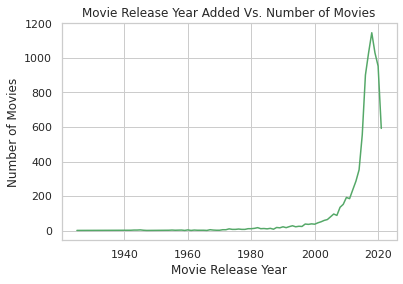

In [66]:
g1 = sns.lineplot(graph1['release_year'],graph1['title'],color='g')
sns.set_style("whitegrid")
g1.set(xlabel ="Movie Release Year", ylabel = "Number of Movies", title ='Movie Release Year Added Vs. Number of Movies')

In [67]:
#--------------------------------------------------------------------------------------------------------#

In [68]:
final_df['Month'] = pd.DatetimeIndex(final_df['date_added']).month

In [69]:
final_df['Year'] = pd.DatetimeIndex(final_df['date_added']).year

In [70]:
# Date added(Month) VS Number. of Movies 
graph2 = final_df[['title','Month']].groupby('Month').nunique().reset_index()
graph2.head()

,Month,title
0,1,737
1,2,562
2,3,741
3,4,763
4,5,632


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Month Added'),
 Text(0.5, 1.0, 'Month Added Vs. Number of Movies')]

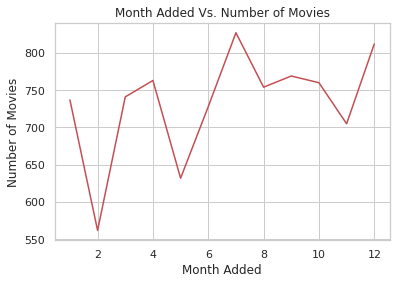

In [71]:
g2 = sns.lineplot(graph2['Month'],graph2['title'],color='r')
sns.set_style("whitegrid")
g2.set(xlabel ="Month Added", ylabel = "Number of Movies", title ='Month Added Vs. Number of Movies')

In [72]:
#--------------------------------------------------------------------------------------------------------#

In [73]:
# Date added(Year) VS Number. of Movies 
graph3 = final_df[['title','Year']].groupby('Year').nunique().reset_index()
graph3.head()

,Year,title
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Year Added'),
 Text(0.5, 1.0, 'Year Added Vs. Number of Movies')]

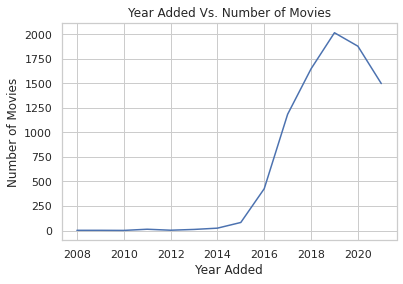

In [74]:
g3 = sns.lineplot(graph3['Year'],graph3['title'],color='b')
sns.set_style("whitegrid")
g3.set(xlabel ="Year Added", ylabel = "Number of Movies", title ='Year Added Vs. Number of Movies')

In [75]:
#--------------------------------------------------------------------------------------------------------#

In [76]:
# Date added(Year) VS Number. of Movies 
graph4 = final_df[['title','country']].groupby('country').nunique().reset_index()
graph4 = graph4.sort_values('title',ascending=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'Number of Movies'),
 Text(0.5, 0, 'Country'),
 Text(0.5, 1.0, 'Country Vs. Number of Movies')]

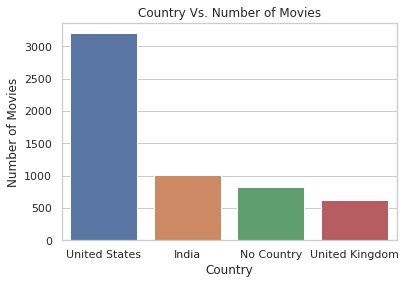

In [77]:
g4 = sns.barplot(graph4['country'].head(4),graph4['title'])
sns.set(style="whitegrid", color_codes=True)
g4.set(xlabel ="Country", ylabel = "Number of Movies", title ='Country Vs. Number of Movies')

In [78]:
#--------------------------------------------------------------------------------------------------------#

In [79]:
# Director VS Number. of Movies 
graph5 = final_df[['title','director']].groupby('director').nunique().reset_index()
graph5 = graph5.sort_values('title',ascending=False).reset_index()
graph5.head()

,index,director,title
0,3682,No Director,2621
1,4019,Rajiv Chilaka,22
2,4066,Raúl Campos,18
3,261,Jan Suter,18
4,4650,Suhas Kadav,16


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Rajiv Chilaka'),
 Text(0, 0, 'Raúl Campos'),
 Text(0, 0, ' Jan Suter'),
 Text(0, 0, 'Suhas Kadav'),
 Text(0, 0, 'Marcus Raboy'),
 Text(0, 0, 'Jay Karas')]

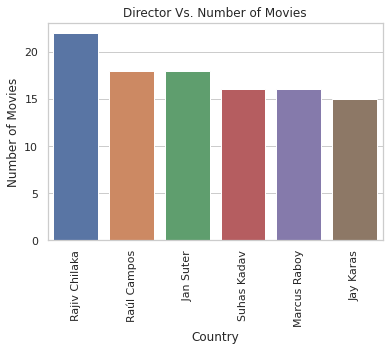

In [80]:
g5 = sns.barplot(graph5['director'].loc[1:6],graph5['title'])
sns.color_palette("tab10")
sns.set(style="whitegrid", color_codes=True)
g5.set(xlabel ="Country", ylabel = "Number of Movies", title ='Director Vs. Number of Movies')
g5.set_xticklabels(labels = graph5['director'].loc[1:6],rotation=90)

In [81]:
#--------------------------------------------------------------------------------------------------------#

In [82]:
# Cast VS Number. of Movies 
graph6 = final_df[['title','cast']].groupby('cast').nunique().reset_index()
graph6 = graph6.sort_values('title',ascending=False).reset_index()
graph6.head()

,index,cast,title
0,37602,No Cast,825
1,2605,Anupam Kher,39
2,26903,Rupa Bhimani,31
3,30263,Takahiro Sakurai,30
4,15518,Julie Tejwani,28


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, ' Anupam Kher'),
 Text(0, 0, ' Rupa Bhimani'),
 Text(0, 0, ' Takahiro Sakurai'),
 Text(0, 0, ' Julie Tejwani'),
 Text(0, 0, ' Om Puri'),
 Text(0, 0, 'Shah Rukh Khan')]

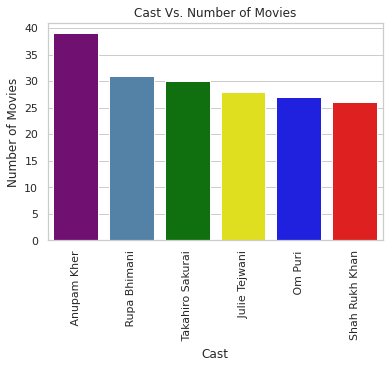

In [83]:
g6 = sns.barplot(graph6['cast'].loc[1:6],graph6['title'],palette=['purple', 'steelblue','green','yellow','blue','red'])
sns.set(style="whitegrid", color_codes=True)
g6.set(xlabel ="Cast", ylabel = "Number of Movies", title ='Cast Vs. Number of Movies')
g6.set_xticklabels(labels = graph6['cast'].loc[1:6],rotation=90)

In [84]:
#--------------------------------------------------------------------------------------------------------#

In [85]:
# Cast VS Number. of Movies 
graph7 = final_df[['title','listed_in']].groupby('listed_in').nunique().reset_index()
graph7 = graph7.sort_values('title',ascending=False).reset_index()
graph7.head()

,index,listed_in,title
0,13,International Movies,2624
1,49,Dramas,1599
2,44,Comedies,1210
3,37,Action & Adventure,859
4,47,Documentaries,829


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Dramas'),
 Text(0, 0, 'Comedies'),
 Text(0, 0, 'Action & Adventure'),
 Text(0, 0, 'Documentaries'),
 Text(0, 0, ' Dramas'),
 Text(0, 0, 'International TV Shows'),
 Text(0, 0, ' Independent Movies'),
 Text(0, 0, ' TV Dramas'),
 Text(0, 0, ' Romantic Movies'),
 Text(0, 0, 'Children & Family Movies')]

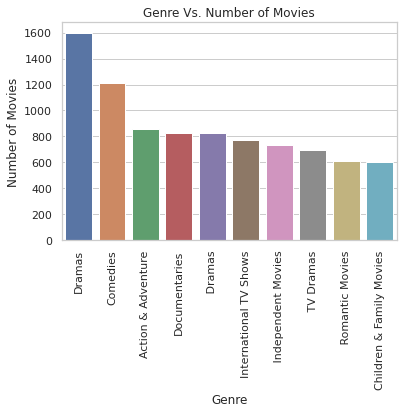

In [86]:
g7 = sns.barplot(graph7['listed_in'].loc[1:10],graph7['title'],palette="deep")
sns.set(style="whitegrid", color_codes=True)
g7.set(xlabel ="Genre", ylabel = "Number of Movies", title ='Genre Vs. Number of Movies')
g7.set_xticklabels(labels = graph7['listed_in'].loc[1:10],rotation=90)

In [87]:
#--------------------------------------------------------------------------------------------------------#

In [88]:
# Rating VS Number. of Movies 
graph8 = final_df[['title','rating']].groupby('rating').nunique().reset_index()
graph8 = graph8.sort_values('title',ascending=False).reset_index()
graph8.head()

,index,rating,title
0,2,teen,4131
1,0,adult,4092
2,1,kids,306
3,3,universal,261


([<matplotlib.patches.Wedge at 0x7f8459deb190>,
 [Text(0.10363654771107865, 1.0951070568572414, 'teen'),
  Text(-0.32192208749852963, -1.051839421955932, 'adult'),
  Text(1.0521840015353314, -0.32079405685439005, 'kids'),
  Text(1.095217558656, -0.10246218430031266, 'universal')],
 [Text(0.05652902602422471, 0.5973311219221317, '47%'),
  Text(-0.17559386590828888, -0.5737305937941447, '47%'),
  Text(0.5739185462919989, -0.1749785764660309, '3%'),
  Text(0.5973913956305454, -0.0558884641638069, '3%')])

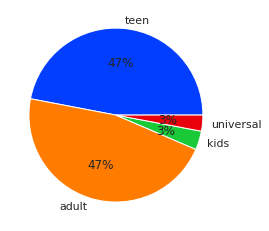

In [89]:
palette_color = sns.color_palette('bright')
plt.pie(graph8['title'], labels=graph8['rating'], colors=palette_color, autopct='%.0f%%')

In [90]:
#--------------------------------------------------------------------------------------------------------#
#----------------------------------End of Visualization---------------------------------------#
#--------------------------------------------------------------------------------------------------------#

In [91]:
#-----------------------------------Business Insights----------------------------------------------#

In [157]:
final_df[['cast','country']].groupby('country').nunique().sort_values(by = 'cast',ascending=False).reset_index().head(9)

,country,cast
0,United States,14207
1,India,4034
2,No Country,4018
3,United States,3467
4,United Kingdom,3044
5,Canada,1644
6,France,1467
7,Japan,1401
8,France,1382


In [159]:
final_df[['cast','country']].groupby('country').nunique().sort_values(by = 'cast',ascending=False).reset_index().tail(9)

,country,cast
189,Greece,1
190,Ukraine,1
191,Sri Lanka,1
192,Samoa,1
193,Guatemala,1
194,Palestine,1
195,Kazakhstan,1
196,Uganda,1
197,Slovenia,1


In [158]:
# An insight here is that maximum casting is done from US followed by India, UK, Canada, France, Japan

In [106]:
final_df[['rating','title']].groupby('rating').nunique().reset_index().head(9)

,rating,title
0,adult,4092
1,kids,306
2,teen,4131
3,universal,261


In [103]:
# There are 4092 adult movies, 306 kids movies, 4131 teen movies and 261 universal 
# movies on NEtflix. Netflix has a good amount of adult and universal movies but 
# can focus on adding more kids and universal titles. 

In [111]:
final_df[['listed_in','title']].groupby('listed_in').nunique().sort_values(by = 'title',ascending=False).reset_index()

,listed_in,title
0,International Movies,2624
1,Dramas,1599
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,Sports Movies,1
71,TV Sci-Fi & Fantasy,1


In [ ]:
# 2 insight can be drawn from the above output 
# 1) International movies, dramas and comedies are the most common genres on Netflix
# If netflix wants to compete with other similar platforms, it needs to make sure there 
# is no other platform which provides a better proportion of genres so Netflix should 
# strategize accordingly. FOr example, public sentiment shouldn't be that Netflix doesnt 
# have enough horror movies so lets move to Amazon prime. 
# 2) From the below table we can see which genres Netflix needs to focus on more. 
# TV Sci-Fi Fantsy, LGBTQ, sports movies, romantic movies all of these need more 
# titles to be added so that people dont shift to other platforms. 

In [112]:
final_df[['listed_in','title']].groupby('listed_in').nunique().sort_values(by = 'title',ascending=True).reset_index()

,listed_in,title
0,TV Sci-Fi & Fantasy,1
1,LGBTQ Movies,1
2,Sports Movies,1
3,Spanish-Language TV Shows,2
4,Romantic Movies,3
...,...,...
68,Documentaries,829
69,Action & Adventure,859
70,Comedies,1210
71,Dramas,1599


In [119]:
final_df['director'].value_counts()

No Director            50425
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Leslye Davis               1
 Freddie Waters            1
Dave Skinner               1
Alex Gibney                1
Kirsten Johnson            1
Name: director, Length: 5119, dtype: int64

In [ ]:
# A basic insight is that Martin Scorsese is one of the directors or solely directed
# the most movies on Netflix followed by Youssef Chahine, Cathy Garcia-Molina and
# Steven Spielberg

In [123]:
final_df['cast'].value_counts()

No Cast              2149
 Alfred Molina        160
 Salma Hayek          130
 Frank Langella       128
 John Rhys-Davies     125
                     ... 
 Ann Magnuson           1
 Ian Buchanan           1
 Patrick Bauchau        1
Kelsy Abbott            1
Aaron Pedersen          1
Name: cast, Length: 39249, dtype: int64

In [ ]:
# Another basic insight is Alfred Molina, Salma Hayek, Frank Langella, John Rhys-Davies
# are actors who have acted in the most movies on Netflix

In [135]:
final_df[['cast','director','title']].groupby(['cast','director']).nunique().sort_values(by = 'title',ascending=False).reset_index().loc[2:10]

,cast,director,title
2,Rajesh Kava,Rajiv Chilaka,19
3,Julie Tejwani,Rajiv Chilaka,19
4,Jigna Bhardwaj,Rajiv Chilaka,18
5,Rupa Bhimani,Rajiv Chilaka,18
6,Vatsal Dubey,Rajiv Chilaka,16
7,Fortune Feimster,No Director,16
8,Junichi Suwabe,No Director,16
9,Yuki Kaji,No Director,16
10,David Attenborough,No Director,15


In [136]:
# An important insight from this is that (Rajesh Kava,Rajiv Chilaka),
#(Julie Tejwani,Rajiv Chilaka),
#(Jigna Bhardwaj,Rajiv Chilaka),
# (Rupa Bhimani, Rajiv Chilaka),
# (Vatsal Dubey,Rajiv Chilaka)	 actor,director pairs are the 
# most common or we can say most compatible or comfortable together 

In [143]:
temp_df = final_df[final_df['director'] != 'No Director']

In [145]:
temp_df[['listed_in','director','title']].groupby(['listed_in','director']).nunique().sort_values(by = 'title',ascending=False).reset_index().head(10)

,listed_in,director,title
0,Children & Family Movies,Rajiv Chilaka,22
1,Stand-Up Comedy,Raúl Campos,18
2,Stand-Up Comedy,Jan Suter,18
3,Children & Family Movies,Suhas Kadav,16
4,Stand-Up Comedy,Marcus Raboy,15
5,Stand-Up Comedy,Jay Karas,14
6,Stand-Up Comedy,Jay Chapman,11
7,International Movies,Cathy Garcia-Molina,11
8,International Movies,Youssef Chahine,10
9,Action & Adventure,Don Michael Paul,9


In [ ]:
# From the above output, we can get some insight from (genre,director) pairs
# Rajiv Chilaka has made the most Children and Family Movies, Raul Campos and 
# Jan Suter have made the most Stand-Up Comedy shows/movies

In [150]:
temp_df[['duration','director','title']].groupby(['duration','director']).nunique().sort_values(by = 'title',ascending=False).reset_index().head(10)

,duration,director,title
0,68,Rajiv Chilaka,6
1,23,Joey So,6
2,64,Rajiv Chilaka,5
3,44,Edward Cotterill,4
4,122,Rathindran R Prasad,4
5,99,Toshiya Shinohara,4
6,104,Kıvanç Baruönü,3
7,98,Ashwin Saravanan,3
8,70,Ryan Polito,3
9,91,Fernando Ayllón,3


In [155]:
final_df['duration'].value_counts().reset_index().head(10)

,index,duration
0,1,34977
1,2,9485
2,3,5064
3,94,4343
4,106,4040
5,97,3624
6,95,3560
7,96,3511
8,93,3480
9,90,3305


In [ ]:
# From the above
# We can infer that 1 season shows are the most common on Netflix followed
# by 2 season and 3 season shows. Talking about movies, 94 mins and 106 mins 
# movies are the most common

In [160]:
##-----------------------------------------THE END---------------------------------------##